In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude

2025-07-02 16:06:23.623252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from loss import custom_loss_wrapper

model = load_model(
    "/home/users/dprimosc/L1METML/experiments/l1metml_v1/25May21_normf100_clip_140X/25May21_normf100_clip_140Xmodel.h5",
    custom_objects={"custom_loss": custom_loss_wrapper},
)

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_cat0 (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_cat1 (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 embedding0 (Embedding)      (None, 128, 2)               12        ['input_cat0[0][0]']          
                                                                                                  
 embedding1 (Embedding)      (None, 128, 2)               8         ['input_cat1[0][0]']          
                                                                                              

In [11]:
w = model.layers[14].weights[0].numpy()
h, b = np.histogram(w, bins=100)

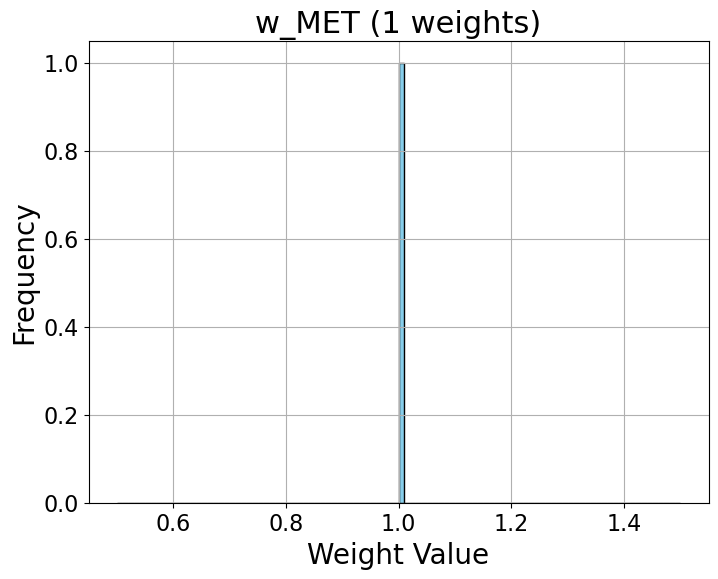